In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'ml_dataset.csv'
dataset = pd.read_csv(data_path)

# head of dataset
dataset.head()

,source,headline,date,conflict,responsibility
0,CNN,Displaced people of Gaza left with little to s...,"Oct 26, 23",Israel - Gaza,No
1,CNN,Palestinians in Gaza caught in the crosshairs ...,"Oct 10, 23",Israel - Gaza,No
2,CNN,"A year of war in Gaza: Thousands of deaths, ma...","Oct 8, 23",Israel - Gaza,No
3,CNN,A small chapel in Gaza City offers sanctuary t...,"Feb 22, 24",Israel - Gaza,Direct
4,CNN,‘Don’t know which body belongs to whom:’ Hear ...,"Jun 10, 24",Israel - Gaza,No


# Exploratory Data Analysis

In [2]:
# Exploratory Data Analysis
# Basic overview of the dataset
summary_dataset = {
    "Column Names": dataset.columns.tolist(),
    "Data Types": dataset.dtypes.to_dict(),
    "Missing Values": dataset.isnull().sum().to_dict(),
    "Duplicate Rows": dataset.duplicated().sum(),
    "Summary Statistics": dataset.describe(include='all').to_dict()
}

# Formatting the output for better readability
print(f"""
Exploratory Data Analysis Summary:

1. Column Names:
   {", ".join(summary_dataset["Column Names"])}

2. Data Types:
   {pd.Series(summary_dataset["Data Types"])}

3. Missing Values:
   {pd.Series(summary_dataset["Missing Values"])}

4. Number of Duplicate Rows:
   {summary_dataset["Duplicate Rows"]}

5. Summary Statistics:
{pd.DataFrame(summary_dataset["Summary Statistics"]).transpose().to_string()}
""")


Exploratory Data Analysis Summary:

1. Column Names:
   source, headline, date, conflict, responsibility

2. Data Types:
   source            object
headline          object
date              object
conflict          object
responsibility    object
dtype: object

3. Missing Values:
   source            0
headline          0
date              0
conflict          0
responsibility    0
dtype: int64

4. Number of Duplicate Rows:
   3

5. Summary Statistics:
               count unique                                                                         top freq
source           262      5                                                                         NYT   60
headline         262    257  Hundreds of Ukrainian Troops Feared Captured or Missing in Chaotic Retreat    2
date             262    192                                                                  Nov 17, 24    4
conflict         262      2                                                            Russia - Ukraine  

In [3]:
# No of headlines
total_headlines = len(dataset)

# Headlines in Israel-Gaza conflict
israel_gaza_headlines = dataset[dataset['conflict'] == 'Israel - Gaza'].shape[0]

# Headlines in Russia-Ukraine conflict
russia_ukraine_headlines = dataset[dataset['conflict'] == 'Russia - Ukraine'].shape[0]

# Headlines per source
headlines_per_source = dataset['source'].value_counts()

# Headlines per conflict
headlines_per_conflict = dataset['conflict'].value_counts()

# Headlines per responsibility label
headlines_per_responsibility = dataset['responsibility'].value_counts()

{
    "Total Headlines": total_headlines,
    "Israel-Gaza Headlines": israel_gaza_headlines,
    "Russia-Ukraine Headlines": russia_ukraine_headlines,
    "Headlines per Source": headlines_per_source.to_dict(),
    "Headlines per Conflict": headlines_per_conflict.to_dict(),
    "Headlines per Responsibility": headlines_per_responsibility.to_dict()
}

{'Total Headlines': 262,
 'Israel-Gaza Headlines': 126,
 'Russia-Ukraine Headlines': 136,
 'Headlines per Source': {'NYT': 60,
  'The Guardian': 52,
  'CNN': 50,
  'BBC': 50,
  'Reuters': 50},
 'Headlines per Conflict': {'Russia - Ukraine': 136, 'Israel - Gaza': 126},
 'Headlines per Responsibility': {'Direct': 143, 'No': 89, 'Indirect': 30}}

In [4]:
# Merge responsibility classes into a single "Yes" class
dataset['responsibility_merged'] = dataset['responsibility'].replace({"Direct": "Yes", "Indirect": "Yes"})
print("Class Distribution After Merging:\n", dataset['responsibility_merged'].value_counts())

Class Distribution After Merging:
 responsibility_merged
Yes    173
No      89
Name: count, dtype: int64


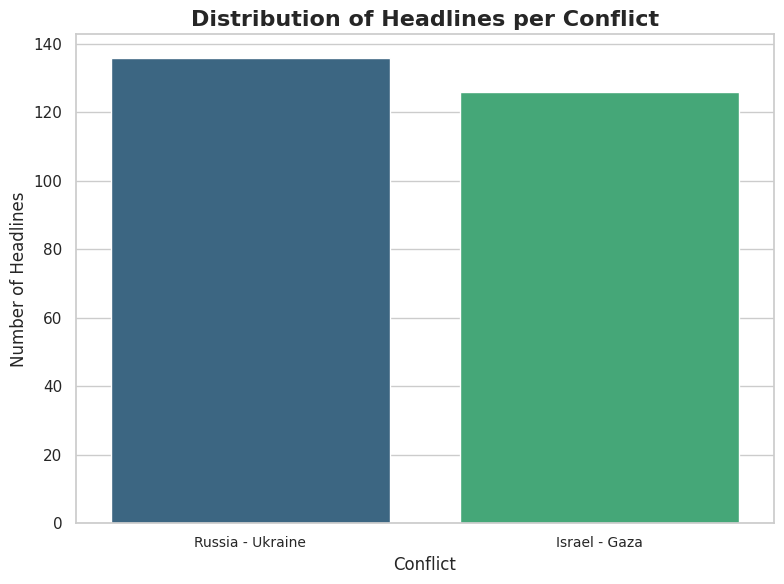

In [5]:
sns.set_theme(style="whitegrid", palette="viridis")
custom_palette = ['#FFA500', '#f4671f', '#f53354']
# Distribution of headlines per conflict
plt.figure(figsize=(8, 6))
conflict_counts = dataset['conflict'].value_counts().reset_index()
conflict_counts.columns = ['conflict', 'count']
sns.barplot(
    data=conflict_counts,
    x='conflict',
    y='count',
    hue='conflict',
    dodge=False,
    palette="viridis"
)
plt.title('Distribution of Headlines per Conflict', fontsize=16, weight='bold')
plt.xlabel('Conflict', fontsize=12)
plt.ylabel('Number of Headlines', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend([], [], frameon=False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


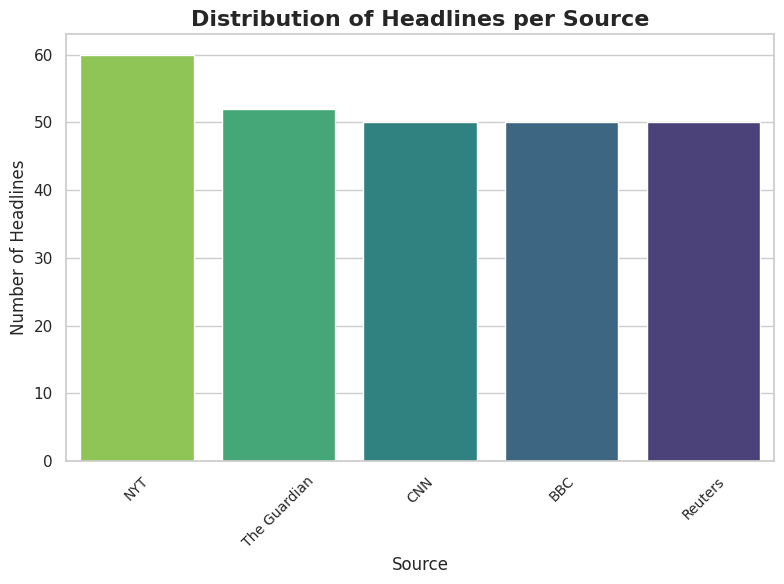

In [6]:
# Distribution of headlines per source
plt.figure(figsize=(8, 6))
source_counts = dataset['source'].value_counts().reset_index()
source_counts.columns = ['source', 'count']
sns.barplot(
    data=source_counts,
    x='source',
    y='count',
    hue='source',
    dodge=False,
    palette="viridis_r"
)
plt.title('Distribution of Headlines per Source', fontsize=16, weight='bold')
plt.xlabel('Source', fontsize=12)
plt.ylabel('Number of Headlines', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


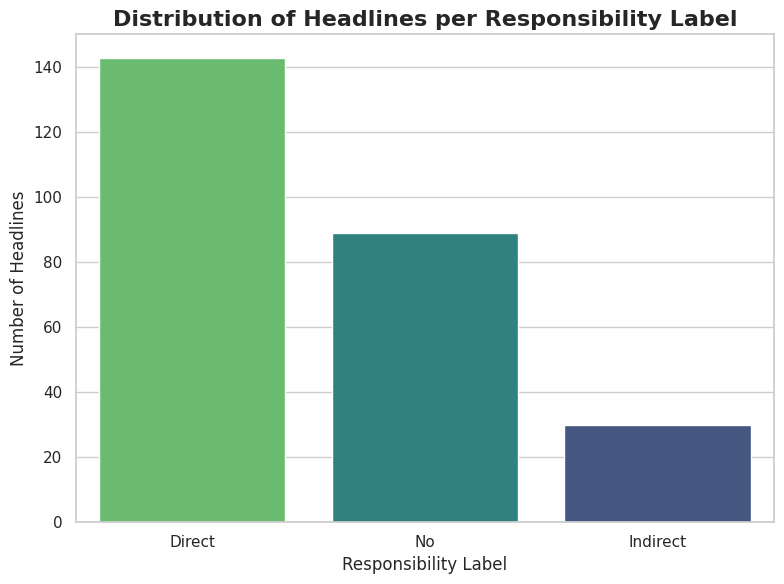

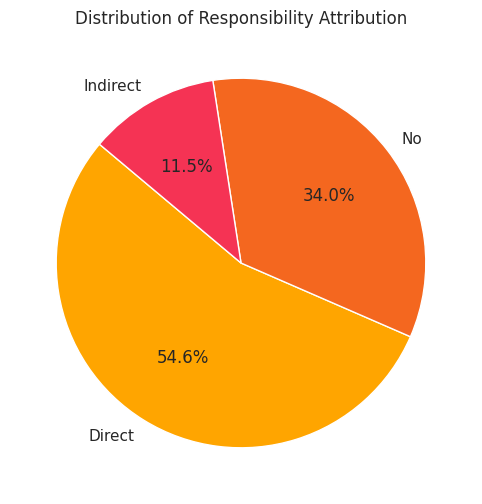

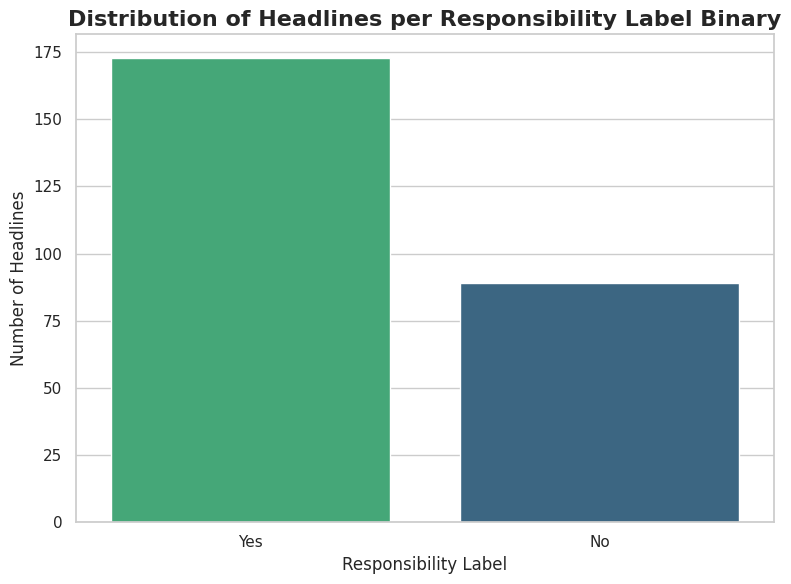

In [7]:
# Distribution of headlines per responsibility label
plt.figure(figsize=(8, 6))
responsibility_counts = dataset['responsibility'].value_counts().reset_index()
responsibility_dist = dataset["responsibility"].value_counts()
responsibility_counts.columns = ['responsibility', 'count']
sns.barplot(
    data=responsibility_counts,
    x='responsibility',
    y='count',
    hue='responsibility',
    dodge=False,
    palette="viridis_r"
)
plt.title('Distribution of Headlines per Responsibility Label', fontsize=16, weight='bold')
plt.xlabel('Responsibility Label', fontsize=12)
plt.ylabel('Number of Headlines', fontsize=12)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

# Distribution of responsibility attribution
plt.figure(figsize=(10, 6))
responsibility_dist.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=custom_palette)
plt.title("Distribution of Responsibility Attribution")
plt.ylabel("")
plt.show()

# Distribution of headlines per responsibility label
plt.figure(figsize=(8, 6))
responsibility_counts = dataset['responsibility_merged'].value_counts().reset_index()
responsibility_dist = dataset["responsibility_merged"].value_counts()
responsibility_counts.columns = ['responsibility_merged', 'count']
sns.barplot(
    data=responsibility_counts,
    x='responsibility_merged',
    y='count',
    hue='responsibility_merged',
    dodge=False,
    palette="viridis_r"
)
plt.title('Distribution of Headlines per Responsibility Label Binary', fontsize=16, weight='bold')
plt.xlabel('Responsibility Label', fontsize=12)
plt.ylabel('Number of Headlines', fontsize=12)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

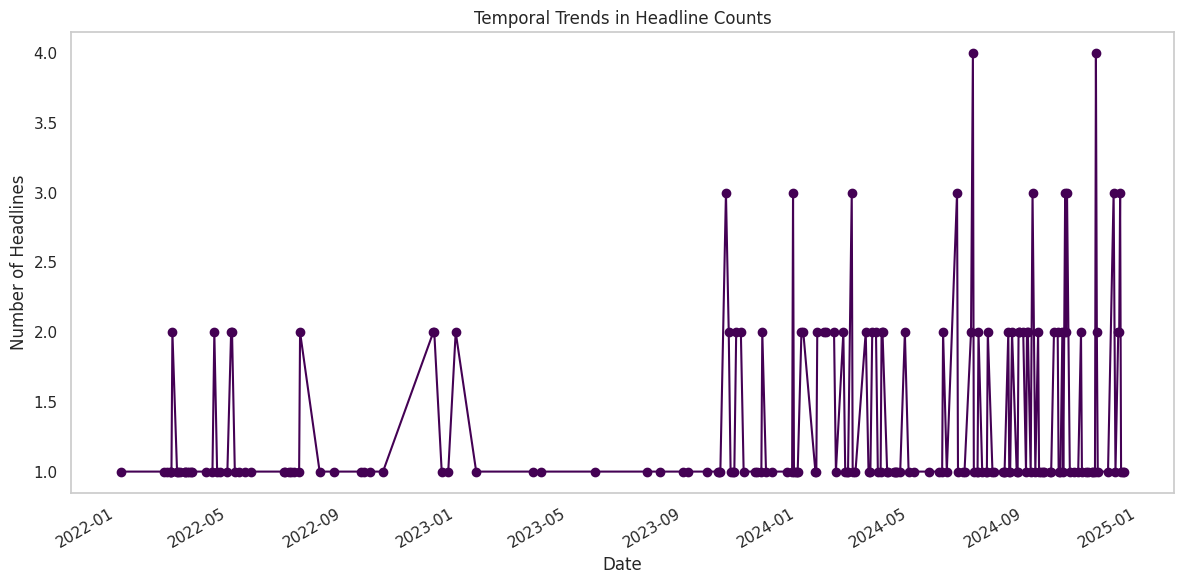

In [8]:
# Convert the 'date' column to datetime with the correct format - Format used in dataset is like Mar 21, 24
dataset['date'] = pd.to_datetime(dataset['date'], format='%b %d, %y', errors='coerce')

# Drop rows with invalid or missing dates
dataset = dataset.dropna(subset=['date'])

# Perform temporal analysis
temporal_analysis = dataset.groupby('date').size()

# Plot the temporal trends
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
temporal_analysis.plot(kind='line', marker='o', colormap="viridis")
plt.title('Temporal Trends in Headline Counts')
plt.xlabel('Date')
plt.ylabel('Number of Headlines')
plt.grid()
plt.tight_layout()
plt.show()

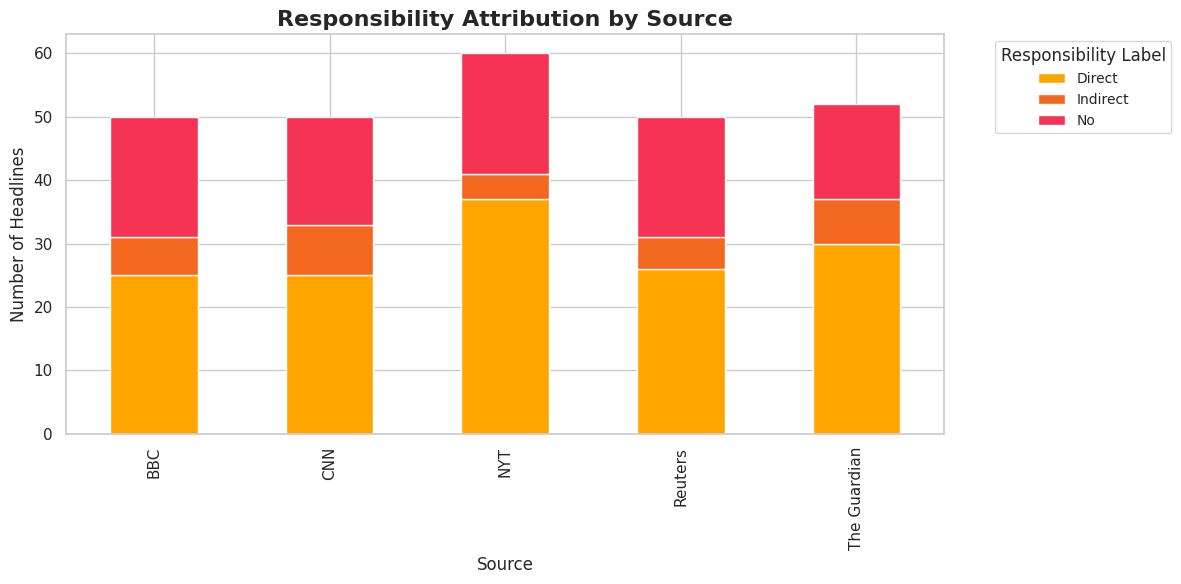

In [9]:
responsibility_source = dataset.groupby(['source', 'responsibility']).size().unstack()
# Plotting Responsibility Attribution Patterns
responsibility_source.plot(
    kind='bar',
    figsize=(12, 6),
    stacked=True,
    color=custom_palette
)
plt.title('Responsibility Attribution by Source', fontsize=16, weight='bold')
plt.xlabel('Source', fontsize=12)
plt.ylabel('Number of Headlines', fontsize=12)
plt.legend(title='Responsibility Label', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

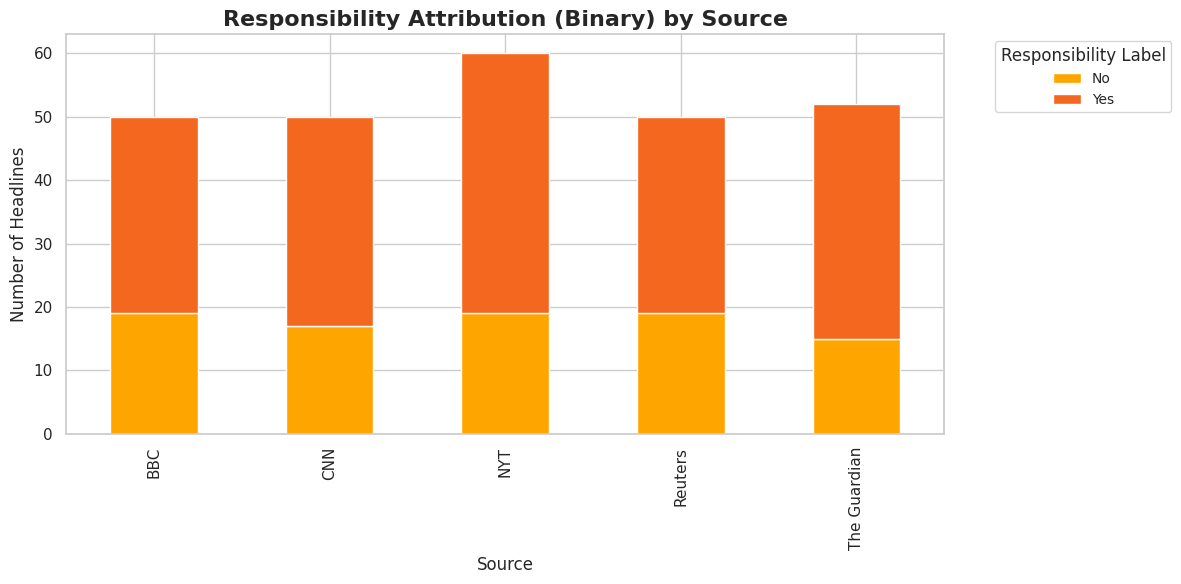

In [10]:
responsibility_source = dataset.groupby(['source', 'responsibility_merged']).size().unstack()
# Plotting Responsibility Attribution Patterns
responsibility_source.plot(
    kind='bar',
    figsize=(12, 6),
    stacked=True,
    color=custom_palette
)
plt.title('Responsibility Attribution (Binary) by Source', fontsize=16, weight='bold')
plt.xlabel('Source', fontsize=12)
plt.ylabel('Number of Headlines', fontsize=12)
plt.legend(title='Responsibility Label', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

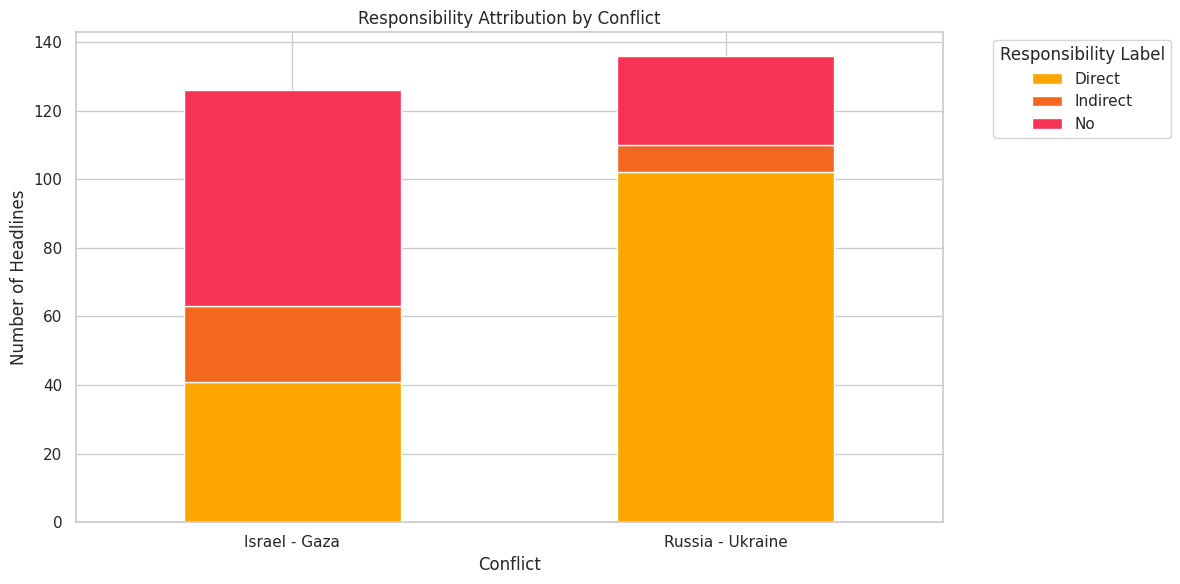

In [11]:
# Responsibility Attribution Patterns by Conflict
responsibility_conflict = dataset.groupby(['conflict', 'responsibility']).size().unstack()

# Plotting Responsibility Attribution Patterns by Conflict
responsibility_conflict.plot(kind='bar', figsize=(12, 6), stacked=True, color=custom_palette)
plt.title('Responsibility Attribution by Conflict')
plt.xlabel('Conflict')
plt.ylabel('Number of Headlines')
plt.legend(title='Responsibility Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

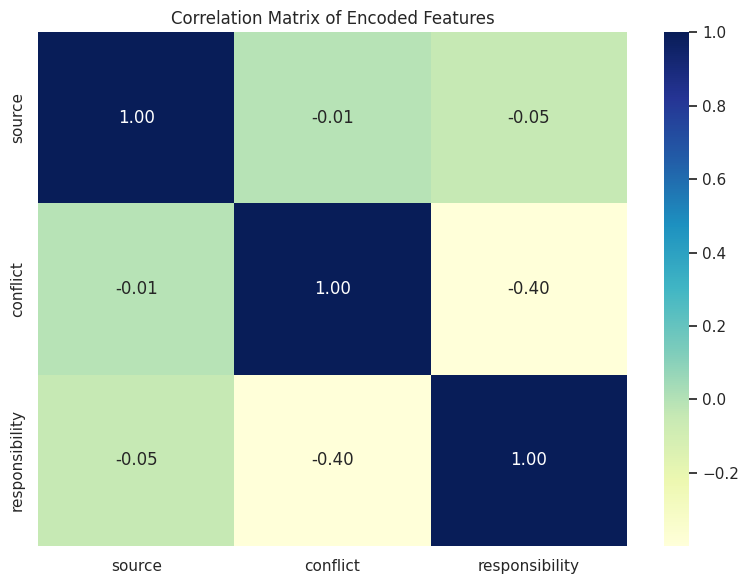

In [12]:
# Correlation Analysis: Using encoded variables for analysis
from sklearn.preprocessing import LabelEncoder

# Ensure only categorical columns are encoded
encoded_dataset = dataset.copy()
for col in ['source', 'conflict', 'responsibility']:
    encoded_dataset[col] = LabelEncoder().fit_transform(dataset[col])

# Drop non-categorical columns before correlation
encoded_dataset = encoded_dataset[['source', 'conflict', 'responsibility']]

# Correlation matrix
correlation_matrix = encoded_dataset.corr()

# Plotting the correlation heatmap using Yellow-Green-Blue color map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix of Encoded Features')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [13]:
# Missing values
dataset_cleaned_missing = dataset.dropna(subset=['date'])

# Remove Duplicates
dataset_cleaned = dataset_cleaned_missing.drop_duplicates()

preprocessing_summary = {
    "Rows after removing missing dates": dataset_cleaned_missing.shape[0],
    "Rows after removing duplicates": dataset_cleaned.shape[0],
    "Missing Values after cleaning": dataset_cleaned.isnull().sum().to_dict()
}

preprocessing_summary


{'Rows after removing missing dates': 262,
 'Rows after removing duplicates': 259,
 'Missing Values after cleaning': {'source': 0,
  'headline': 0,
  'date': 0,
  'conflict': 0,
  'responsibility': 0,
  'responsibility_merged': 0}}

In [14]:
import spacy

# Load the SpaCy English model
nlp = spacy.load("en_core_web_sm")

def spacy_preprocess_headline(headline):
    doc = nlp(headline.lower())
    # Remove stopwords, punctuation, and lemmatize words
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(tokens)

# Copy dataset into new variable
dataset_cleaned = dataset_cleaned.copy()

# Apply SpaCy preprocessing to the 'headline' column
dataset_cleaned.loc[:, 'spacy_cleaned_headline'] = dataset_cleaned['headline'].apply(spacy_preprocess_headline)
dataset_cleaned[['headline', 'spacy_cleaned_headline']].head()


,headline,spacy_cleaned_headline
0,Displaced people of Gaza left with little to s...,displace people gaza leave little survive
1,Palestinians in Gaza caught in the crosshairs ...,palestinians gaza catch crosshair war israel h...
2,"A year of war in Gaza: Thousands of deaths, ma...",year war gaza thousand death malnutrition lack...
3,A small chapel in Gaza City offers sanctuary t...,small chapel gaza city offer sanctuary palesti...
4,‘Don’t know which body belongs to whom:’ Hear ...,know body belong hear eyewitness gaza strike


In [15]:
# Normalize categorical data
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['conflict', 'source', 'responsibility', 'responsibility_merged']:
    le = LabelEncoder()
    dataset_cleaned[column] = le.fit_transform(dataset_cleaned[column])
    label_encoders[column] = le

dataset_cleaned['spacy_cleaned_headline'] = dataset_cleaned['spacy_cleaned_headline'].str.replace(r'\s+', ' ', regex=True).str.strip()

for column, encoder in label_encoders.items():
    print(f"Mapping for '{column}':")
    for index, class_ in enumerate(encoder.classes_):
        print(f"{class_} -> {index}")
    print("-" * 30)


Mapping for 'conflict':
Israel - Gaza -> 0
Russia - Ukraine -> 1
------------------------------
Mapping for 'source':
BBC -> 0
CNN -> 1
NYT -> 2
Reuters -> 3
The Guardian -> 4
------------------------------
Mapping for 'responsibility':
Direct -> 0
Indirect -> 1
No -> 2
------------------------------
Mapping for 'responsibility_merged':
No -> 0
Yes -> 1
------------------------------


In [16]:
dataset_cleaned['responsibility'].value_counts(normalize=True)
dataset_cleaned['responsibility_merged'].value_counts(normalize=True)

# The dataset is imbalance as we can see from output


,proportion
responsibility_merged,
1,0.660232
0,0.339768


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# TF-IDF transformation
tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(dataset_cleaned['spacy_cleaned_headline'])
tfidf_features = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

dataset_cleaned['word_count'] = dataset_cleaned['spacy_cleaned_headline'].apply(lambda x: len(x.split()))
dataset_cleaned['char_count'] = dataset_cleaned['spacy_cleaned_headline'].apply(len)


# Select numerical features to add to the TF-IDF matrix
numerical_features = dataset_cleaned[['word_count', 'char_count']].values

# Combine TF-IDF and numerical features
X = np.hstack((tfidf_matrix.toarray(), numerical_features))

# Target variable
y = dataset_cleaned['responsibility']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority classes - Indirect Class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
from collections import Counter
balanced_classes = Counter(y_train_resampled)
balanced_classes




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Counter({2: 115, 0: 115, 1: 115})

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    print(f"Results for {name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 30)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Results for Logistic Regression:
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        26
           1       0.33      0.17      0.22         6
           2       0.82      0.70      0.76        20

    accuracy                           0.75        52
   macro avg       0.64      0.60      0.60        52
weighted avg       0.73      0.75      0.73        52

------------------------------
Results for Random Forest:
Accuracy: 0.8076923076923077
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        26
           1       1.00      0.17      0.29         6
           2       0.80      0.80      0.80        20

    accuracy                           0.81        52
   macro avg       0.87      0.64      0.65        52
weighted avg       0.83      0.81      0.78        52

------------------------------
Results for Gradient Boosting:
Accuracy: 0.8846153846153846
            

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_tuned))


Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        26
           1       0.67      0.33      0.44         6
           2       0.95      0.90      0.92        20

    accuracy                           0.87        52
   macro avg       0.82      0.73      0.75        52
weighted avg       0.86      0.87      0.85        52



In [20]:
# Transform responsibility classes
dataset_cleaned['responsibility'] = dataset_cleaned['responsibility'].replace({2: 0, 0: 1})

# Verify the class distribution after merging
merged_class_distribution = dataset_cleaned['responsibility'].value_counts(normalize=True)
print("Class Distribution After Merging:\n", merged_class_distribution)

# Display the updated dataset
print(dataset_cleaned)
y = dataset_cleaned['responsibility']


Class Distribution After Merging:
 responsibility
1    0.660232
0    0.339768
Name: proportion, dtype: float64
     source                                           headline       date  \
0         1  Displaced people of Gaza left with little to s... 2023-10-26   
1         1  Palestinians in Gaza caught in the crosshairs ... 2023-10-10   
2         1  A year of war in Gaza: Thousands of deaths, ma... 2023-10-08   
3         1  A small chapel in Gaza City offers sanctuary t... 2024-02-22   
4         1  ‘Don’t know which body belongs to whom:’ Hear ... 2024-06-10   
..      ...                                                ...        ...   
257       3  Russian missile kills three women at Ukrainian... 2023-03-24   
258       3  Russia's biggest air attack of war kills 31 in... 2023-12-29   
259       3  Russian missile attack on Ukraine's Kharkiv ki... 2024-03-20   
260       3  Ukrainian brigade says 19 killed in Russian mi... 2023-11-29   
261       3  Russian missiles kill 20 in O

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Results for Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))  # Added zero_division to handle undefined metrics - to get rid of warning


Results for Gradient Boosting:
Accuracy: 0.9423076923076923
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.94      0.97      0.95        32

    accuracy                           0.94        52
   macro avg       0.94      0.93      0.94        52
weighted avg       0.94      0.94      0.94        52



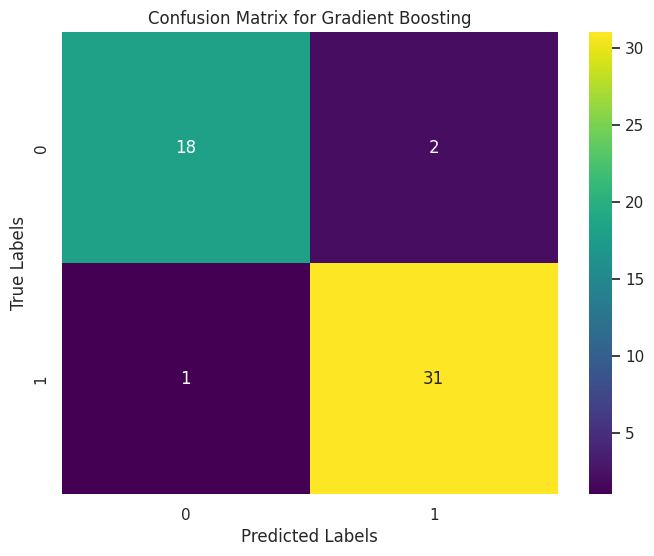

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(
    GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=200, random_state=42),
    X_train, y_train, cv=5, scoring='accuracy'
)

# Print the cross-validation accuracy
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-validation Accuracy Scores: [0.97619048 1.         1.         0.97560976 0.90243902]
Mean Accuracy: 0.9708478513356562


In [24]:
import joblib

# Save the model to a file
joblib.dump(model, 'gradient_boosting_model.pkl')

# Load the model to verify
loaded_model = joblib.load('gradient_boosting_model.pkl')


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Extract text column
X = dataset_cleaned[['spacy_cleaned_headline']]
y = dataset_cleaned['responsibility']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract text data for training and testing
X_train_text = X_train['spacy_cleaned_headline']
X_test_text = X_test['spacy_cleaned_headline']

# Create a pipeline with TF-IDF and Gradient Boosting
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Train the pipeline
pipeline.fit(X_train_text, y_train)

# Save the pipeline
joblib.dump(pipeline, 'gradient_boosting_pipeline.pkl')

# Load and test the pipeline
loaded_pipeline = joblib.load('gradient_boosting_pipeline.pkl')
y_pred = loaded_pipeline.predict(X_test_text)

# Evaluate the pipeline
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.9423076923076923
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.94      0.97      0.95        32

    accuracy                           0.94        52
   macro avg       0.94      0.93      0.94        52
weighted avg       0.94      0.94      0.94        52



In [26]:
# Load the saved pipeline
loaded_pipeline = joblib.load('gradient_boosting_pipeline.pkl')

# Predict on new headlines
new_headlines = ["Gazans say 24 were killed in an airstrike", "Israeli airstrike killed 1000 people"]
predictions = loaded_pipeline.predict(new_headlines)

print(predictions)  # Outputs: [0, 1] (e.g., No Responsibility, Yes Responsibility)


[0 1]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00
      source                                           headline       date  \
0        CNN  Displaced people of Gaza left with little to s... 2023-10-26   
1        CNN  Palestinians in Gaza caught in the crosshairs ... 2023-10-10   
2        CNN  A year of war in Gaza: Thousands of deaths, ma... 2023-10-08   
3        CNN  A small chapel in Gaza City offers sanctuary t... 2024-02-22   
4        CNN  ‘Don’t know which body belongs to whom:’ Hear ... 2024-06-10   
..       ...                                                ...        ...   
257  Reuters  Russian missile kills three women at Ukrainian... 2023-03-24   
258  Reuters  Russia's biggest air attack of war kills 31 in... 2023-12-29   
259  Reuters  Russian missile attack on Ukraine's Kharkiv ki... 2024-03-20   
260  Reuters  Ukrainian brigade says 19 killed in Russian mi... 2023-11-29   
261  Reuters  Russian missiles kill 20 in Odesa, Zelenskiy v..

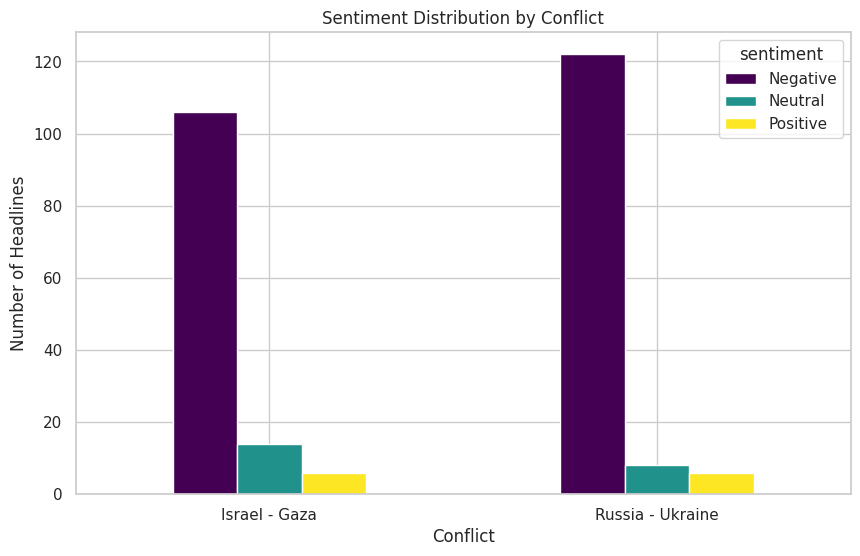

In [27]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy

# Load SpaCy and VADER
nlp = spacy.load("en_core_web_sm")
vader = SentimentIntensityAnalyzer()

# Sentiment analysis function
def analyze_sentiment(text):
    scores = vader.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return "Positive"
    elif scores['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

print(dataset)
# Apply to dataset
dataset['sentiment'] = dataset['headline'].apply(analyze_sentiment)

# Compare sentiment distribution across conflicts
sentiment_by_conflict = dataset.groupby(['conflict', 'sentiment']).size().unstack(fill_value=0)
print(sentiment_by_conflict)

# Plotting data
sentiment_by_conflict.plot(kind='bar', figsize=(10, 6), colormap="viridis")
plt.title("Sentiment Distribution by Conflict")
plt.xlabel("Conflict")
plt.xticks(rotation=0)
plt.ylabel("Number of Headlines")
plt.show()


responsibility   0  Yes  Responsibility Attributed (%)
conflict                                              
Israel-Gaza     63   63                      50.000000
Russia-Ukraine  25  108                      81.203008


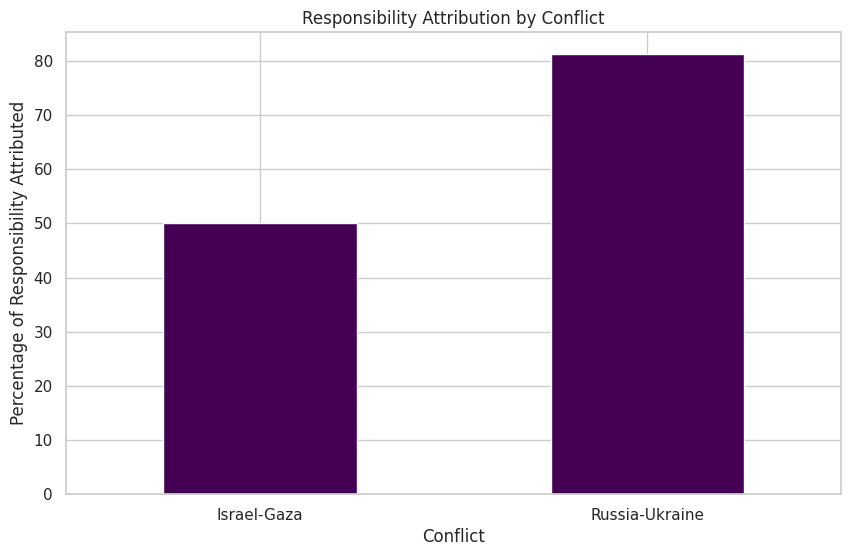

In [28]:
# Define mappings for conflicts and responsibilities for plots
conflict_mapping = {0: "Israel-Gaza", 1: "Russia-Ukraine"}
responsibility_mapping = {1: "Yes", 2: "No"}

# Responsibility attribution distribution by conflict
responsibility_dist = dataset_cleaned.groupby(['conflict', 'responsibility']).size().unstack(fill_value=0)

# Rename index (conflict) and columns (responsibility)
responsibility_dist = responsibility_dist.rename(index=conflict_mapping, columns=responsibility_mapping)

# Add the percentage column
responsibility_dist['Responsibility Attributed (%)'] = (
    responsibility_dist["Yes"] / responsibility_dist.sum(axis=1)
) * 100

print(responsibility_dist)

# Visualize
responsibility_dist[['Responsibility Attributed (%)']].plot(
    kind='bar',
    figsize=(10, 6),
    colormap="viridis",
    legend=False
)
plt.title("Responsibility Attribution by Conflict")
plt.xlabel("Conflict")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Responsibility Attributed")
plt.show()


conflict                           
Israel - Gaza     Gaza                 98
                  Israel               24
                  Gaza City             6
                  south Gaza            1
                  Gaza Strip            1
                  Killing               1
                  Northern Gaza         1
                  Gaza Fighting         1
                  U.S.                  1
                  Bombing               1
                  North and South       1
                  Mawasi                1
Russia - Ukraine  Ukraine              61
                  Russia               34
                  Ukrainian             7
                  Odesa                 4
                  US                    2
                  Lviv                  2
                  U.S.                  2
                  Donetsk               1
                  Mariupol              1
                  Izmail                1
                  Strike                

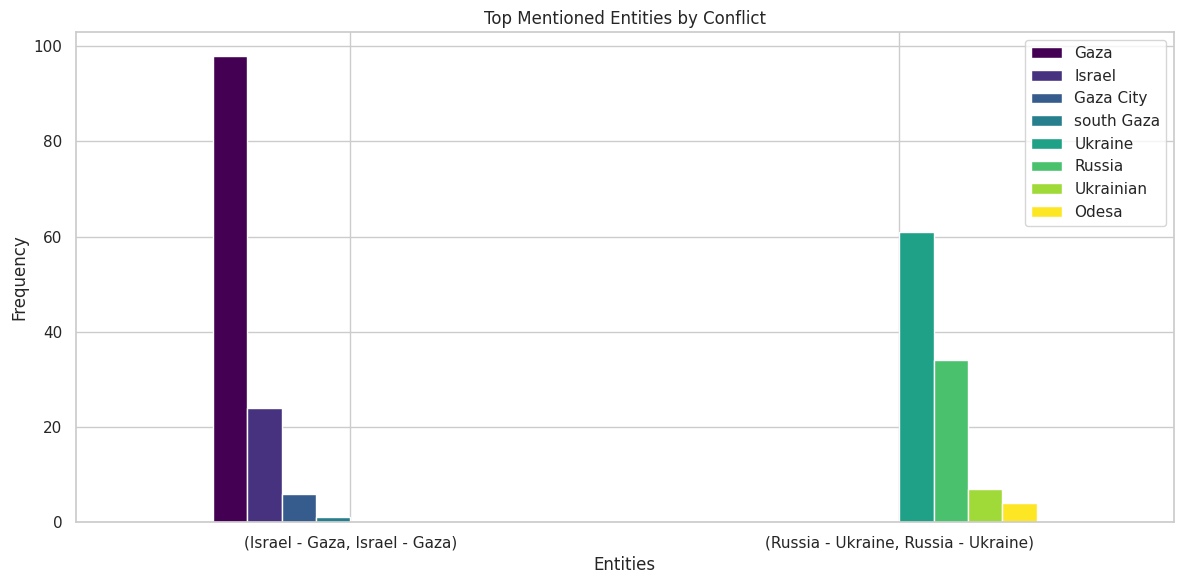

In [29]:
# Entity extraction
def extract_entities(text, label_type="GPE"):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == label_type]

# Extract entities for each headline
dataset['entities'] = dataset['headline'].apply(lambda x: extract_entities(x))

# Flatten and count entities by conflict
entity_counts = dataset.groupby('conflict')['entities'].apply(lambda x: pd.Series(x.explode()).value_counts())

print(entity_counts)
top_entities_per_conflict = entity_counts.groupby(level=0).apply(lambda group: group.nlargest(4)).unstack()

# Plotting
top_entities_per_conflict.plot(kind='bar', figsize=(12, 6), colormap="viridis")
plt.title("Top Mentioned Entities by Conflict")
plt.xlabel("Entities")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [30]:
# Extract SVO SUbject Verb Object
def extract_svo(text):
    doc = nlp(text)
    svo_triples = []
    for token in doc:
        if token.dep_ == "nsubj":
            subject = token.text
            verb = token.head.text
            obj = [child.text for child in token.head.children if child.dep_ == "dobj"]
            if obj:
                svo_triples.append((subject, verb, obj[0]))
    return svo_triples

# Apply to dataset
dataset['svo'] = dataset['headline'].apply(extract_svo)

# Compare SVO patterns across conflicts
svo_by_conflict = dataset.groupby('conflict')['svo'].apply(lambda x: pd.Series(x.explode()).value_counts())
print(svo_by_conflict)


conflict                                        
Israel - Gaza     (forces, kill, people)            2
                  (Crisis, Crowd, Convoy)           1
                  (Evacuees, Face, Airstrikes)      1
                  (attacks, kill, dozens)           1
                  (UN, demands, ceasefire)          1
                                                   ..
Russia - Ukraine  (Strikes, Kill, Several)          1
                  (Attacks, Kill, Civilians)        1
                  (Russia, Fires, Barrage)          1
                  (Russia, has, list)               1
                  (Zelenskiy, vows, retaliation)    1
Name: svo, Length: 118, dtype: int64


In [31]:
def extract_svo(doc):
    triples = []
    for token in doc:
        if token.dep_ == "nsubj":  # Subject
            subject = token.text
            verb = token.head.text  # Verb
            obj = [child.text for child in token.head.children if child.dep_ == "dobj"]  # Object
            if obj:
                triples.append((subject, verb, obj[0]))
    return triples

def contains_responsibility_terms(doc):
    responsibility_terms = {"blamed", "responsible", "caused", "Israel", "Russia", "israeli", "russian"}
    return any(token.text in responsibility_terms for token in doc)

def predict_responsibility(headline):
    doc = nlp(headline)
    # Check for SVO structure
    svo_triples = extract_svo(doc)
    # Check for responsibility terms
    has_responsibility_terms = contains_responsibility_terms(doc)

    # If either condition is met, predict responsibility
    if svo_triples or has_responsibility_terms:
        return 1  # Responsibility Attributed
    else:
        return 0  # No Responsibility

dataset_cleaned['predicted_responsibility_rule_based'] = dataset_cleaned['headline'].apply(predict_responsibility)


In [32]:
from sklearn.metrics import classification_report

# Actual vs Predicted
actual = dataset_cleaned['responsibility']
predicted = dataset_cleaned['predicted_responsibility_rule_based']

print(classification_report(actual, predicted))


              precision    recall  f1-score   support

           0       0.48      0.67      0.56        88
           1       0.79      0.63      0.70       171

    accuracy                           0.64       259
   macro avg       0.64      0.65      0.63       259
weighted avg       0.68      0.64      0.65       259

